# Bgt2Vec

Original code is generated from © Yuriy Guts, 2016

## Imports

In [15]:
from __future__ import absolute_import, division, print_function

In [16]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [17]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Set up logging**

In [19]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**Download NLTK tokenizer models (only the first time)**

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sultan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Prepare Corpus

In [21]:
# change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [22]:
df = pd.read_csv('CombinedData.csv', engine='python')

In [23]:
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [24]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [25]:
corpus = df.word
# Join the elements and sperate them by a single space
corpus = ' '.join(word for word in corpus)

In [26]:
corpus[:196]

'fiscal year adopted budget brenda jones county manager sharisse fuller assistant county managerhuman resources director prepared office budget management evaluation michael halford budget director'

In [27]:
# change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData\TextFiles") 

# Creating a text file
text_data = open("CombinedData.txt","a") 

# Writing the string to the file
text_data.write(corpus)

# Closing the file
text_data.close() 

**Load files**

In [28]:
bgt_filename = "CombinedData.txt"

In [29]:
corpus_raw = u""
print("Reading '{0}'...".format(bgt_filename))
with codecs.open(bgt_filename, "r", "utf-8") as book_file:
    corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'CombinedData.txt'...
Corpus is now 133965480 characters long



**Split the corpus into sentences**

In [30]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [31]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [32]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [33]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [34]:
token_count = sum([len(sentence) for sentence in sentences])
print("corpus contains {0:,} tokens".format(token_count))

corpus contains 15,922,096 tokens


## Train Word2Vec

In [35]:
# Dimensionality of the resulting word vectors.
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [36]:
bgt2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
    
)

In [37]:
bgt2vec.build_vocab(sentences)

2019-12-05 16:31:45,407 : INFO : collecting all words and their counts
2019-12-05 16:31:45,423 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-05 16:31:52,184 : INFO : collected 34079 word types from a corpus of 15922096 raw words and 1 sentences
2019-12-05 16:31:52,186 : INFO : Loading a fresh vocabulary
2019-12-05 16:31:53,706 : INFO : effective_min_count=3 retains 34079 unique words (100% of original 34079, drops 0)
2019-12-05 16:31:53,706 : INFO : effective_min_count=3 leaves 15922096 word corpus (100% of original 15922096, drops 0)
2019-12-05 16:31:54,076 : INFO : deleting the raw counts dictionary of 34079 items
2019-12-05 16:31:54,076 : INFO : sample=0.001 downsamples 42 most-common words
2019-12-05 16:31:54,076 : INFO : downsampling leaves estimated 14607448 word corpus (91.7% of prior 15922096)
2019-12-05 16:31:54,361 : INFO : estimated required memory for 34079 words and 300 dimensions: 98829100 bytes
2019-12-05 16:31:54,361 : INFO : resetti

In [38]:
print("Word2Vec vocabulary length:", len(bgt2vec.wv.vocab))

Word2Vec vocabulary length: 34079


**Start training**

In [39]:
bgt2vec.train(sentences, total_examples=bgt2vec.corpus_count, epochs=50)

2019-12-05 16:31:56,050 : INFO : training model with 3 workers on 34079 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2019-12-05 16:31:56,174 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:31:56,178 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:31:56,783 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:31:56,798 : INFO : EPOCH - 1 : training on 15922096 raw words (10000 effective words) took 0.7s, 14071 effective words/s
2019-12-05 16:31:56,828 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:31:56,833 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:31:57,336 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:31:57,338 : INFO : EPOCH - 2 : training on 15922096 raw words (10000 effective words) took 0.5s, 19150 effective words/s
2019-12-05 16:31:57,364 : INFO : w

2019-12-05 16:32:06,877 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:32:06,884 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:32:07,354 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:32:07,356 : INFO : EPOCH - 21 : training on 15922096 raw words (10000 effective words) took 0.5s, 20477 effective words/s
2019-12-05 16:32:07,400 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:32:07,416 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:32:07,877 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:32:07,877 : INFO : EPOCH - 22 : training on 15922096 raw words (10000 effective words) took 0.5s, 20280 effective words/s
2019-12-05 16:32:07,903 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:32:07,912 : INFO : worker thread finished; awaiting finish of 1 more threads


2019-12-05 16:32:16,812 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:32:17,232 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:32:17,234 : INFO : EPOCH - 41 : training on 15922096 raw words (10000 effective words) took 0.4s, 22721 effective words/s
2019-12-05 16:32:17,250 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:32:17,258 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:32:17,687 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-05 16:32:17,687 : INFO : EPOCH - 42 : training on 15922096 raw words (10000 effective words) took 0.4s, 22443 effective words/s
2019-12-05 16:32:17,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-05 16:32:17,713 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-05 16:32:18,125 : INFO : worker thread finished; awaiting finish of 0 more threads


(500000, 796104800)

**Save to file, can be useful later**

In [40]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [41]:
bgt2vec.save(os.path.join("trained", "bgt2vec.w2v"))

2019-12-05 16:32:21,478 : INFO : saving Word2Vec object under trained\bgt2vec.w2v, separately None
2019-12-05 16:32:21,484 : INFO : not storing attribute vectors_norm
2019-12-05 16:32:21,488 : INFO : not storing attribute cum_table
2019-12-05 16:32:27,553 : INFO : saved trained\bgt2vec.w2v


## Explore the trained model.

In [42]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "bgt2vec.w2v"))

2019-12-05 16:32:27,684 : INFO : loading Word2Vec object from trained\bgt2vec.w2v
2019-12-05 16:32:29,867 : INFO : loading wv recursively from trained\bgt2vec.w2v.wv.* with mmap=None
2019-12-05 16:32:29,867 : INFO : setting ignored attribute vectors_norm to None
2019-12-05 16:32:29,867 : INFO : loading vocabulary recursively from trained\bgt2vec.w2v.vocabulary.* with mmap=None
2019-12-05 16:32:29,884 : INFO : loading trainables recursively from trained\bgt2vec.w2v.trainables.* with mmap=None
2019-12-05 16:32:29,888 : INFO : setting ignored attribute cum_table to None
2019-12-05 16:32:29,957 : INFO : loaded trained\bgt2vec.w2v


### Compress the word vectors into 2D space and plot them

In [43]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [44]:
all_word_vectors_matrix = bgt2vec.wv.syn0

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


**Train t-SNE**

In [45]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

**Plot the big picture**

In [46]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[bgt2vec.wv.vocab[word].index])
            for word in bgt2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [47]:
points.head(10)

,word,x,y
0,fiscal,-22.052570,-36.206825
1,year,-22.133600,-36.144707
2,adopted,-15.454621,-37.595123
3,budget,-24.099937,-32.950588
4,brenda,-22.155476,-32.364536
5,jones,-22.229940,-32.393711
6,county,-20.245398,-35.134274
7,manager,-23.584154,-33.505386
8,sharisse,-22.673412,-32.280544
9,fuller,-22.754921,-32.271549


In [48]:
sns.set_context("poster")

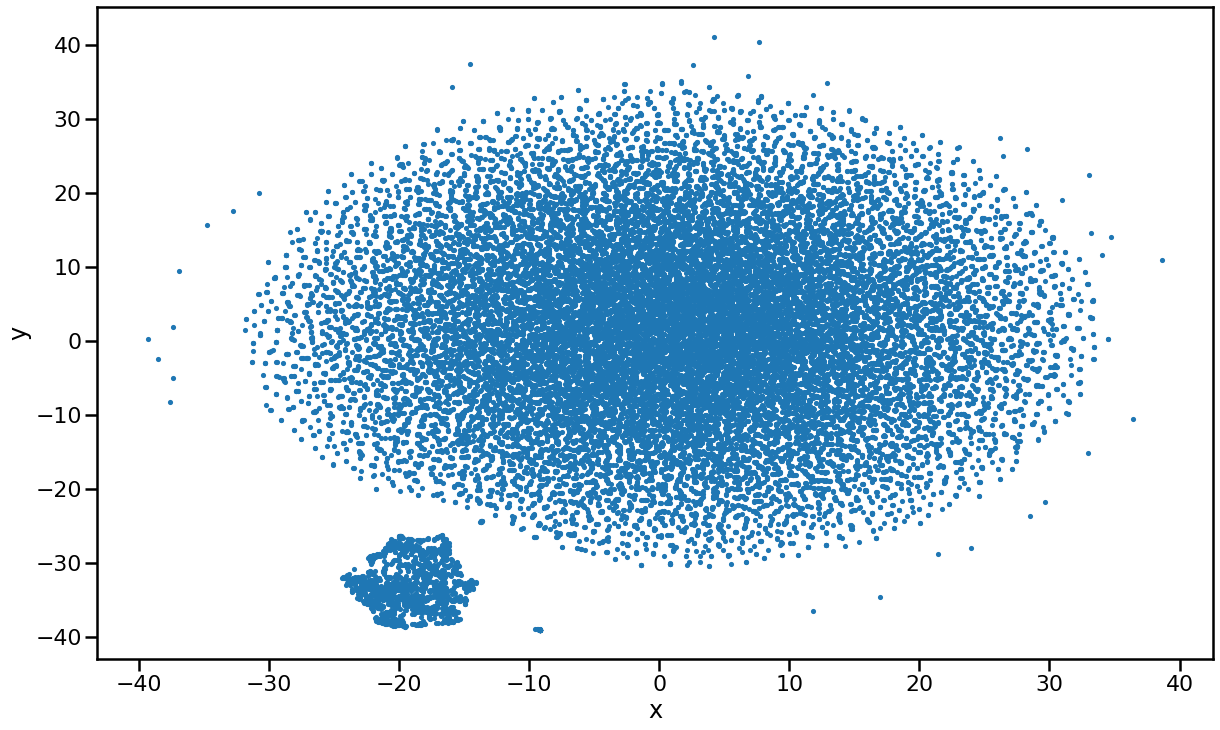

In [49]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

**Zoom in to some interesting places**

In [50]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

**words related endup together**

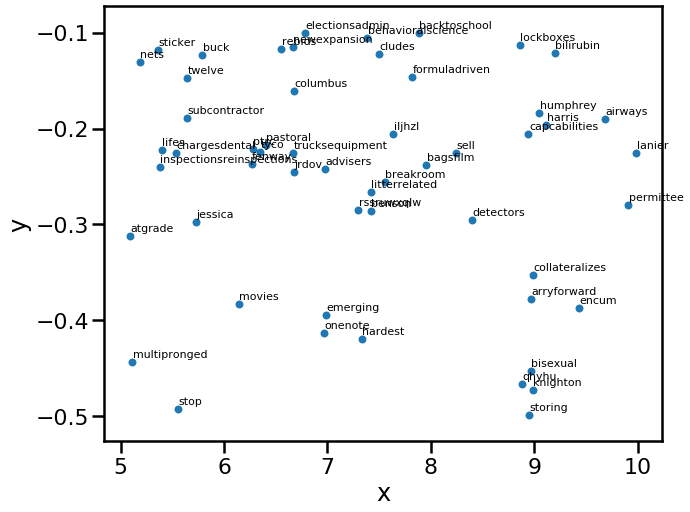

In [51]:
plot_region(x_bounds=(5, 10), y_bounds=(-0.5, -0.1))

### Explore semantic similarities between words

**Words closest to the given word**

In [52]:
bgt2vec.most_similar("guilford")

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-12-05 17:35:22,133 : INFO : precomputing L2-norms of word weight vectors


[('technical', 0.7884438037872314),
 ('making', 0.7805444598197937),
 ('attached', 0.7798840403556824),
 ('ordained', 0.775394082069397),
 ('profile', 0.7663928270339966),
 ('mobility', 0.765678882598877),
 ('nine', 0.7639226317405701),
 ('healththe', 0.7618306875228882),
 ('external', 0.7562916874885559),
 ('allocated', 0.7558035850524902)]

In [65]:
bgt2vec.most_similar("year")

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fiscal', 0.8842571377754211),
 ('close', 0.8322573304176331),
 ('begins', 0.8285021185874939),
 ('colleges', 0.8237432241439819),
 ('certified', 0.8228684663772583),
 ('accountant', 0.8199175596237183),
 ('adopt', 0.8195737600326538),
 ('subdivisions', 0.8194167613983154),
 ('projections', 0.8139117956161499),
 ('calculation', 0.8122355341911316)]

**Linear relationships between word pairs**

In [54]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = bgt2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [66]:
nearest_similarity_cosmul("guilford","county","year")

guilford is related to county, as fiscal is related to year


C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'fiscal'